In [28]:
import pandas as pd
from pandas.io import gbq

import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
query = "SELECT * FROM `umg-comm-tech-dev.adhoc.fixed_playlists_swift_consumption_all`"

data = gbq.read_gbq(query=query, project_id='umg-comm-tech-dev', dialect='standard')
data.head()

,sub_account_name,transaction_source,transaction_date,year,month,euro_amount,upc,total_streams
0,Spotify,Marketing,2018-10-02,2018,10,0.001683,00600406836922,34
1,Rhapsody,Marketing,2018-10-31,2018,10,0.312525,00602567669289,34
2,Deezer,Marketing,2018-08-24,2018,8,0.017995,00602567112389,42
3,Spotify,Marketing,2018-08-11,2018,8,0.327182,00602557814477,81
4,Spotify,Marketing,2018-08-28,2018,8,0.001702,00602557939125,239


In [4]:
dates = pd.read_clipboard()
dates.head()

,Release Date,UPC
0,11/23/2016,00602557103601
1,12/9/2016,00602557342697
2,12/9/2016,00602557342703
3,1/27/2017,00602557414387
4,2/3/2017,00602557437638


In [ ]:
data = data.merge(dates, how='left', left_on='upc', right_on='UPC')

In [7]:
data.columns

Index(['sub_account_name', 'transaction_source', 'transaction_date', 'year',
       'month', 'euro_amount', 'upc', 'total_streams', 'Release Date_x',
       'UPC_x', 'Release Date_y', 'UPC_y'],
      dtype='object')

In [8]:
data = data.drop(columns=['UPC_x', 'Release Date_y', 'UPC_y'])
data = data.rename(columns={'Release Date_x':'release_date'})
data.columns

Index(['sub_account_name', 'transaction_source', 'transaction_date', 'year',
       'month', 'euro_amount', 'upc', 'total_streams', 'release_date'],
      dtype='object')

In [10]:
data.to_gbq('adhoc.fixed_playlists_swift_with_release_date', project_id='umg-comm-tech-dev', verbose=True,
           if_exists='replace')

/usr/local/lib/python3.7/site-packages/pandas_gbq/gbq.py:969: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,

0it [00:00, ?it/s]
1it [03:31, 211.31s/it]


In [15]:
data['release_date_dt'] = pd.to_datetime(data.release_date)

In [16]:
data.head()

,sub_account_name,transaction_source,transaction_date,year,month,euro_amount,upc,total_streams,release_date,release_date_dt
0,Spotify,Marketing,2018-10-02,2018,10,0.001683,00600406836922,34,9/28/2018,2018-09-28
1,Rhapsody,Marketing,2018-10-31,2018,10,0.312525,00602567669289,34,4/27/2018,2018-04-27
2,Deezer,Marketing,2018-08-24,2018,8,0.017995,00602567112389,42,10/20/2017,2017-10-20
3,Spotify,Marketing,2018-08-11,2018,8,0.327182,00602557814477,81,6/30/2017,2017-06-30
4,Spotify,Marketing,2018-08-28,2018,8,0.001702,00602557939125,239,8/18/2017,2017-08-18


In [20]:
### Cleaning the dates


data['date_relevant'] = [1 if x>y else 0 for (x,y) in zip(data.transaction_date,data.release_date_dt)]

In [21]:
data.describe(include='all')

,sub_account_name,transaction_source,transaction_date,year,month,euro_amount,upc,total_streams,release_date,release_date_dt,date_relevant
count,11724536,11724536,11724536,1.172454e+07,1.172454e+07,1.172454e+07,11724536,1.172454e+07,11718855,11718855,1.172454e+07
unique,209,2,905,NaN,NaN,NaN,310,NaN,96,96,NaN
top,Spotify,Marketing,2018-06-15 00:00:00,NaN,NaN,NaN,00602567272366,NaN,12/15/2017,2017-12-15 00:00:00,NaN
freq,4981786,6946777,465513,NaN,NaN,NaN,460012,NaN,647146,647146,NaN
first,NaN,NaN,2007-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-23 00:00:00,NaN
last,NaN,NaN,2018-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-30 00:00:00,NaN
mean,NaN,NaN,NaN,2.017884e+03,8.124023e+00,4.783530e-01,NaN,1.606242e+02,NaN,NaN,9.827021e-01
std,NaN,NaN,NaN,3.251859e-01,3.073791e+00,1.119906e+02,NaN,1.141509e+04,NaN,NaN,1.303790e-01
min,NaN,NaN,NaN,2.007000e+03,1.000000e+00,-1.336857e+04,NaN,-5.599576e+06,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,2.018000e+03,6.000000e+00,3.861927e-03,NaN,3.000000e+00,NaN,NaN,1.000000e+00


In [22]:
data.shape

(11724536, 11)

In [23]:
data_daterel = data[data.date_relevant==1]

In [24]:
data_daterel.shape

(11521726, 11)

In [26]:
data_daterel.head()

,sub_account_name,transaction_source,transaction_date,year,month,euro_amount,upc,total_streams,release_date,release_date_dt,date_relevant
0,Spotify,Marketing,2018-10-02,2018,10,0.001683,00600406836922,34,9/28/2018,2018-09-28,1
1,Rhapsody,Marketing,2018-10-31,2018,10,0.312525,00602567669289,34,4/27/2018,2018-04-27,1
2,Deezer,Marketing,2018-08-24,2018,8,0.017995,00602567112389,42,10/20/2017,2017-10-20,1
3,Spotify,Marketing,2018-08-11,2018,8,0.327182,00602557814477,81,6/30/2017,2017-06-30,1
4,Spotify,Marketing,2018-08-28,2018,8,0.001702,00602557939125,239,8/18/2017,2017-08-18,1


In [33]:
data_daterel.euro_amount.isnull().sum()

1

In [34]:
data_daterel.total_streams.isnull().sum()

0

In [35]:
### Check any outliers on euro amount per 1000 streams
data_daterel['euro_amount'] = data_daterel.euro_amount.fillna(0)
data_daterel = data_daterel[data_daterel.euro_amount>0]
data_daterel = data_daterel[data_daterel.total_streams>0]
data_daterel['eur_per_1000_streams'] = (data_daterel.euro_amount/data_daterel.total_streams)*1000

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
data_daterel.eur_per_1000_streams.describe()

count    1.138590e+07
mean     7.723196e+00
std      3.833780e+02
min      1.851711e-06
25%      8.133934e-01
50%      2.209040e+00
75%      4.879828e+00
max      4.648605e+05
Name: eur_per_1000_streams, dtype: float64

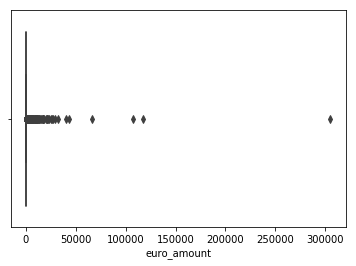

In [47]:
sns.boxplot(data_daterel.euro_amount)

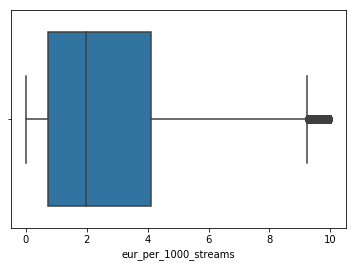

In [41]:
sns.boxplot(data_daterel[data_daterel.eur_per_1000_streams<10].eur_per_1000_streams)

In [43]:
data_daterel[data_daterel.eur_per_1000_streams>10].head()

,sub_account_name,transaction_source,transaction_date,year,month,euro_amount,upc,total_streams,release_date,release_date_dt,date_relevant,eur_per_1000_streams
23,Apple,Finance,2018-07-26,2018,7,41.434708,00602557784459,53,6/23/2017,2017-06-23,1,781.786943
28,Rhapsody,Marketing,2018-08-27,2018,8,1.701327,00602567809081,156,6/22/2018,2018-06-22,1,10.905939
33,Wimp,Finance,2017-04-15,2017,4,0.950907,00602557530711,64,3/3/2017,2017-03-03,1,14.857922
64,Apple,Finance,2017-10-16,2017,10,4.112540,00602557474404,360,2/24/2017,2017-02-24,1,11.423722
113,Apple,Finance,2018-06-08,2018,6,151.961930,00602567053033,193,9/22/2017,2017-09-22,1,787.367513


In [44]:
### Identify which streaming services have outliers in terms of eur per 1000 streams

by_source = data_daterel.groupby(by='sub_account_name')

In [45]:
by_source.total_streams.describe()

,count,mean,std,min,25%,50%,75%,max
sub_account_name,,,,,,,,
24/7,296.0,7.601351,23.525173,1.0,1.00,2.0,7.00,366.0
7 Digital,541.0,2.580407,4.864031,1.0,1.00,1.0,2.00,65.0
7digital Limited,21.0,1.238095,0.538958,1.0,1.00,1.0,1.00,3.0
9 Squared,2.0,17.000000,21.213203,2.0,9.50,17.0,24.50,32.0
"AMI Entertainment, Inc.",125.0,186.712000,499.229226,1.0,7.00,36.0,186.00,3442.0
AWA,21001.0,69.584782,374.011215,1.0,4.00,12.0,35.00,34427.0
Aim4Music,119.0,1.285714,0.523075,1.0,1.00,1.0,1.50,3.0
Airtel,8628.0,1173.280598,11978.979889,1.0,12.00,40.0,188.25,533514.0
AllMusicBox,304.0,5.240132,7.306011,1.0,1.00,2.0,6.00,57.0


In [46]:
by_source.euro_amount.describe()

,count,mean,std,min,25%,50%,75%,max
sub_account_name,,,,,,,,
24/7,296.0,0.236121,0.827359,8.868664e-03,0.018170,0.040551,0.127482,10.478392
7 Digital,541.0,2.156151,4.266285,5.093973e-01,0.876103,0.918500,1.837000,66.046660
7digital Limited,21.0,1.222427,0.617790,7.348785e-01,1.009448,1.017584,1.043232,3.149275
9 Squared,2.0,21.590829,26.901313,2.568728e+00,12.079779,21.590829,31.101880,40.612930
"AMI Entertainment, Inc.",125.0,1.461353,5.632739,4.571289e-04,0.012944,0.070346,0.737427,53.229984
AWA,21001.0,0.620219,4.139886,8.838477e-04,0.013258,0.063232,0.253389,397.636170
Aim4Music,119.0,1.049714,0.383504,9.185001e-01,0.918500,0.918500,0.918500,2.755500
Airtel,8628.0,0.878441,7.877689,6.054983e-04,0.008439,0.033175,0.156645,236.218170
AllMusicBox,304.0,0.078997,0.147366,1.455982e-02,0.021520,0.031472,0.070028,1.198467


In [51]:
by_source.euro_amount.sum().sort_values(ascending=False)

sub_account_name
Movistar                         866690.860593
Spotify                          798835.408417
Deezer                           554168.551307
Apple                            499595.096442
TME                              277720.463558
Pandora                          199944.771722
Loen Entertainment               164972.702109
Napster by Rhapsody              146348.680148
Google                           145990.843356
Vodafone                         121353.228173
Soribada                         119858.640984
YouTube                          101628.504264
Amazon                            97337.312929
Maxis                             93309.271912
M.net                             84799.291869
Rhapsody                          66596.191263
NetEase                           65782.446390
Excelcom                          62603.207274
JOOX                              62408.666884
Oi                                54503.090678
qq                                46269.406

In [48]:
by_source.eur_per_1000_streams.describe()

,count,mean,std,min,25%,50%,75%,max
sub_account_name,,,,,,,,
24/7,296.0,85.314639,264.393978,0.695052,13.880425,16.289009,21.224765,1309.799000
7 Digital,541.0,860.831877,195.078592,292.313130,747.496250,883.354540,918.500070,1520.057000
7digital Limited,21.0,972.498353,143.864506,734.878500,1009.448400,1017.583800,1017.583800,1302.507400
9 Squared,2.0,1276.759131,10.755191,1269.154063,1272.956597,1276.759131,1280.561666,1284.364200
"AMI Entertainment, Inc.",125.0,7.385764,7.360407,0.031401,0.558304,0.808978,15.458494,15.547257
AWA,21001.0,6.958001,4.839681,0.033656,1.398572,7.023311,11.859798,14.046623
Aim4Music,119.0,855.465749,161.186946,306.166690,918.500070,918.500070,918.500070,918.500100
Airtel,8628.0,0.931990,0.617861,0.023288,0.614288,0.699505,0.999167,4.156685
AllMusicBox,304.0,26.571403,58.863127,0.839468,8.470413,20.373706,27.853553,990.000000
